In [1]:
import pandas as pd
import numpy as np
import os
from main import unsupervised_hit_bounce_detection, supervized_hit_bounce_detection
from analyze import plot_predicted_vs_actual_actions, compute_cm
from tqdm import tqdm

In [2]:
ball_files = os.listdir("data/per_point_v2")

In [3]:
cm_supervised = None
cm_unsupervised = None
for ball_file in tqdm(ball_files):
    unsupervised_output = unsupervised_hit_bounce_detection(ball_file)
    
    supervised_output = supervized_hit_bounce_detection(ball_file)
    cm_i_u = compute_cm(unsupervised_output)
    cm_i_s = compute_cm(supervised_output)

    if cm_supervised is None:
        cm_supervised = cm_i_s
        cm_unsupervised = cm_i_u
    else:
        cm_supervised = cm_supervised.add(cm_i_s, fill_value=0)
        cm_unsupervised = cm_unsupervised.add(cm_i_u, fill_value=0)

100%|██████████| 313/313 [22:57<00:00,  4.40s/it]


In [4]:
cm_unsupervised

,Correct,Incorrect
Hit,1275,325
Bounce,1136,310


In [5]:
cm_supervised

,Correct,Incorrect
Hit,1376,224
Bounce,1258,188


ball_data_1.json


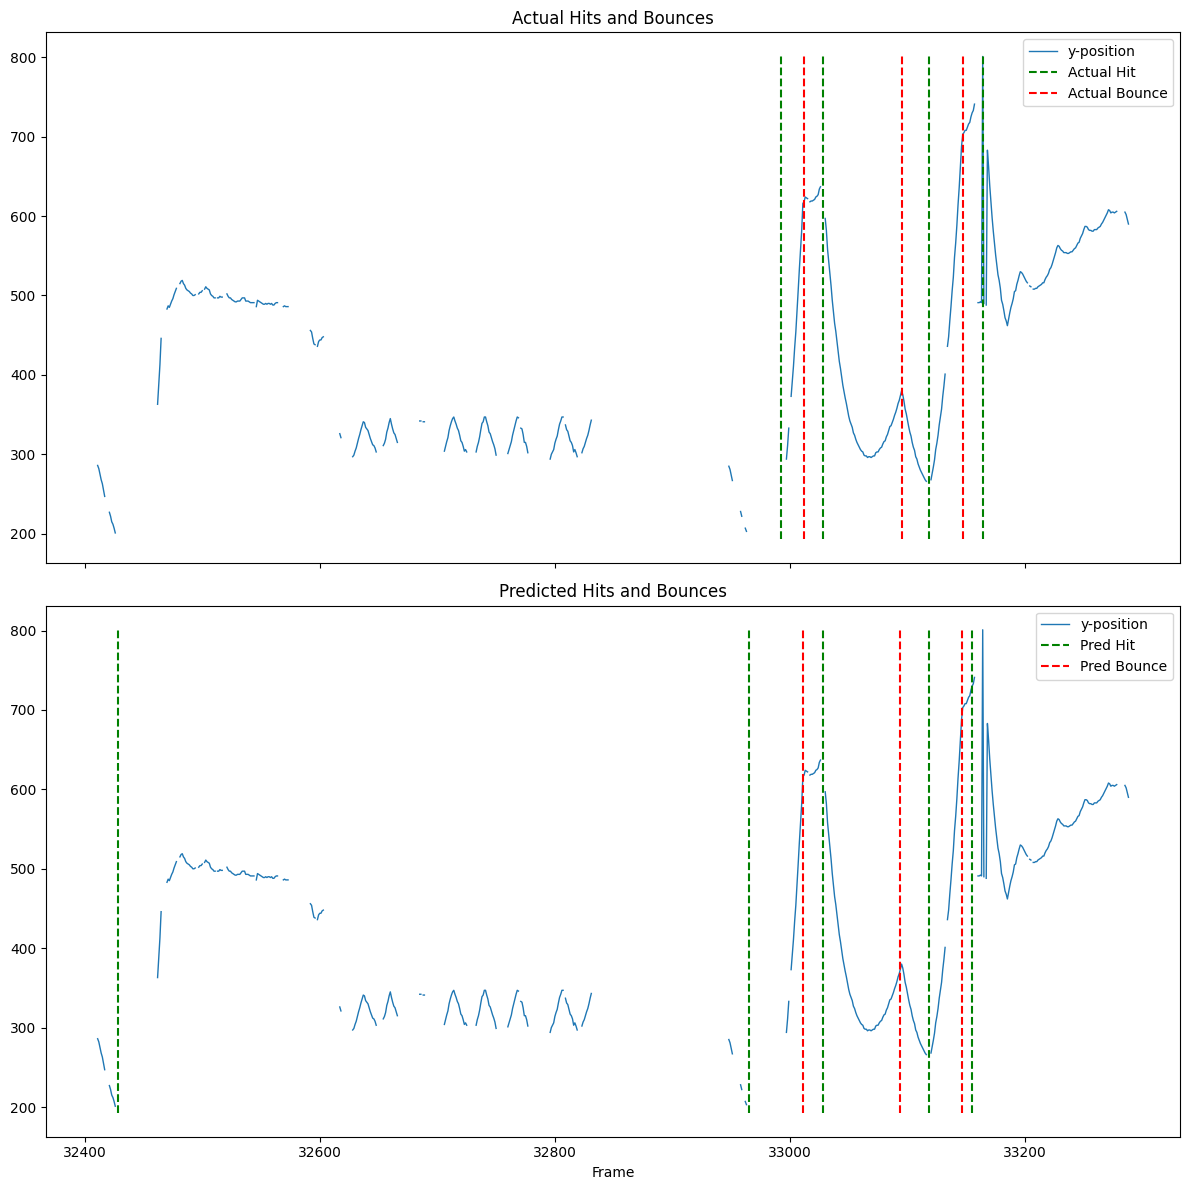

ball_data_10.json


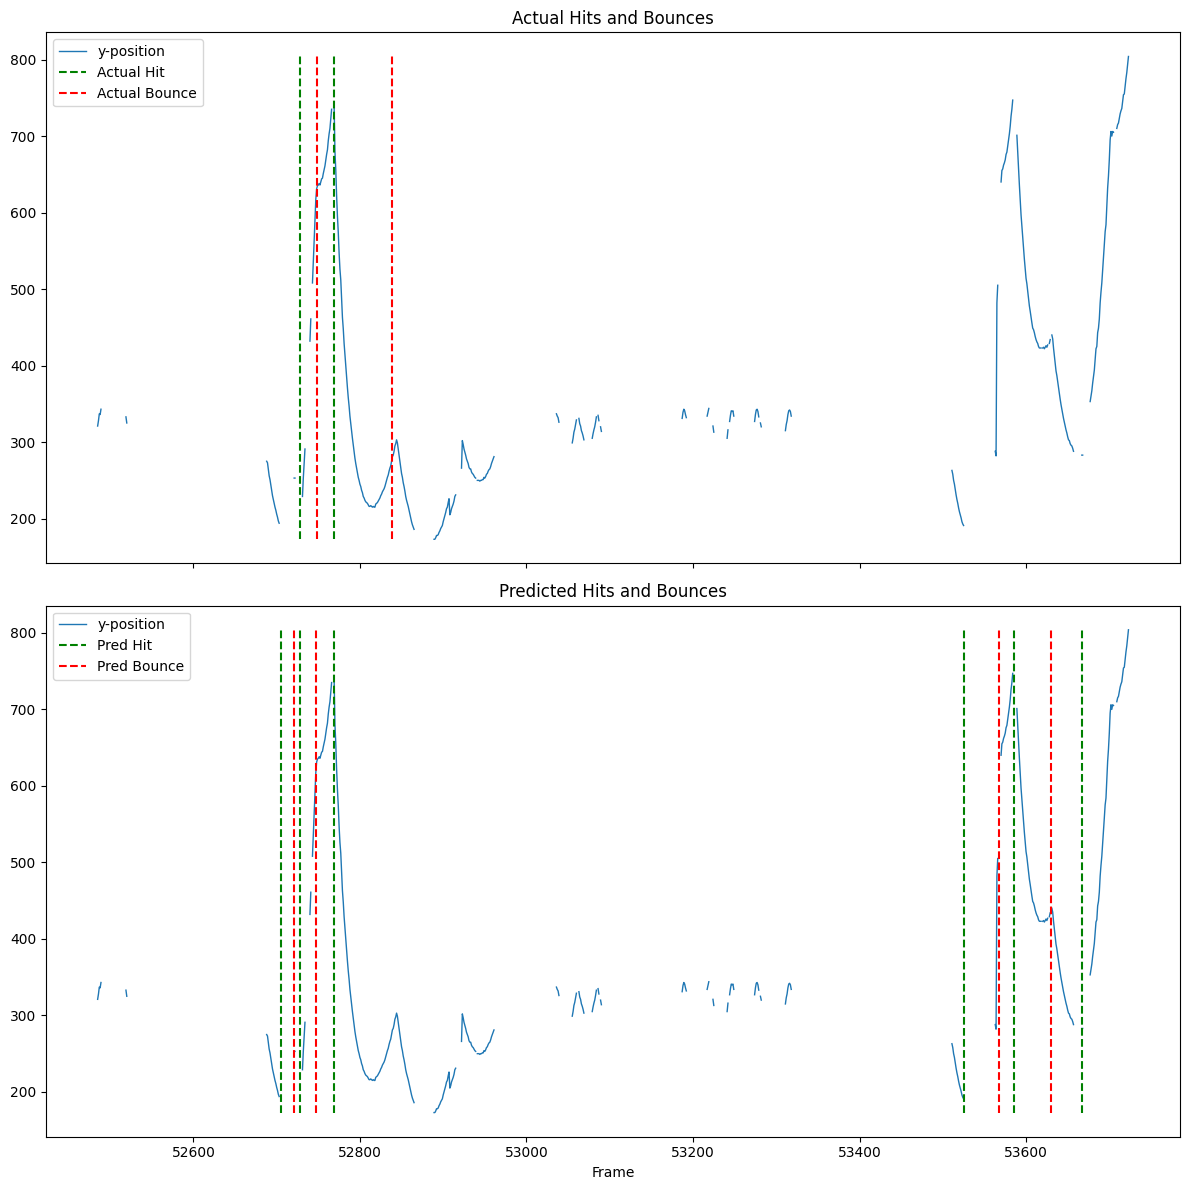

ball_data_100.json


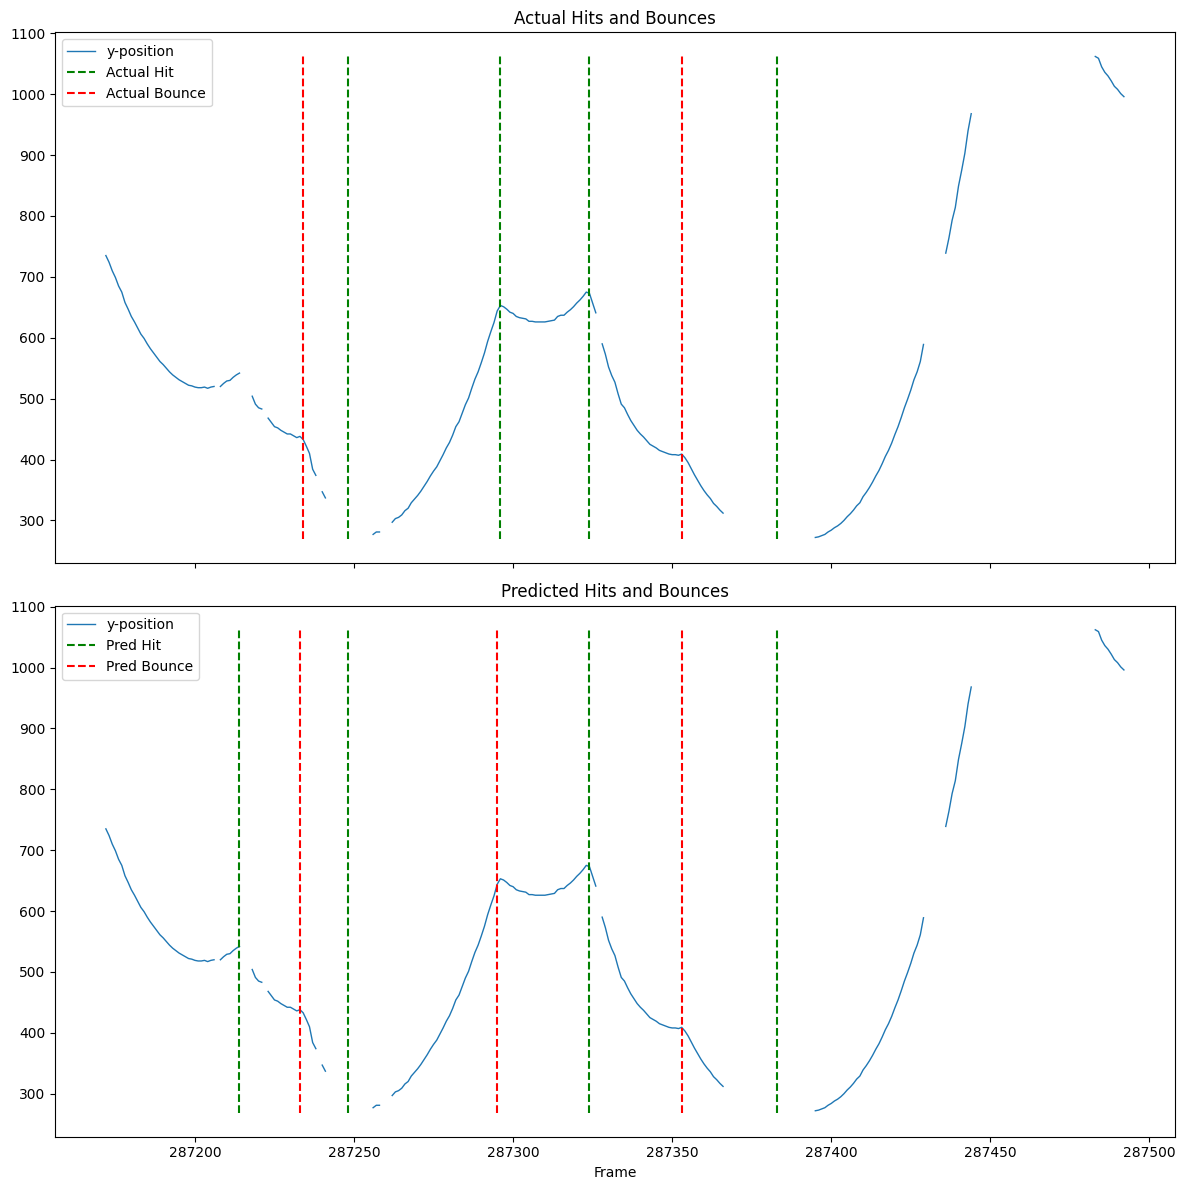

ball_data_102.json


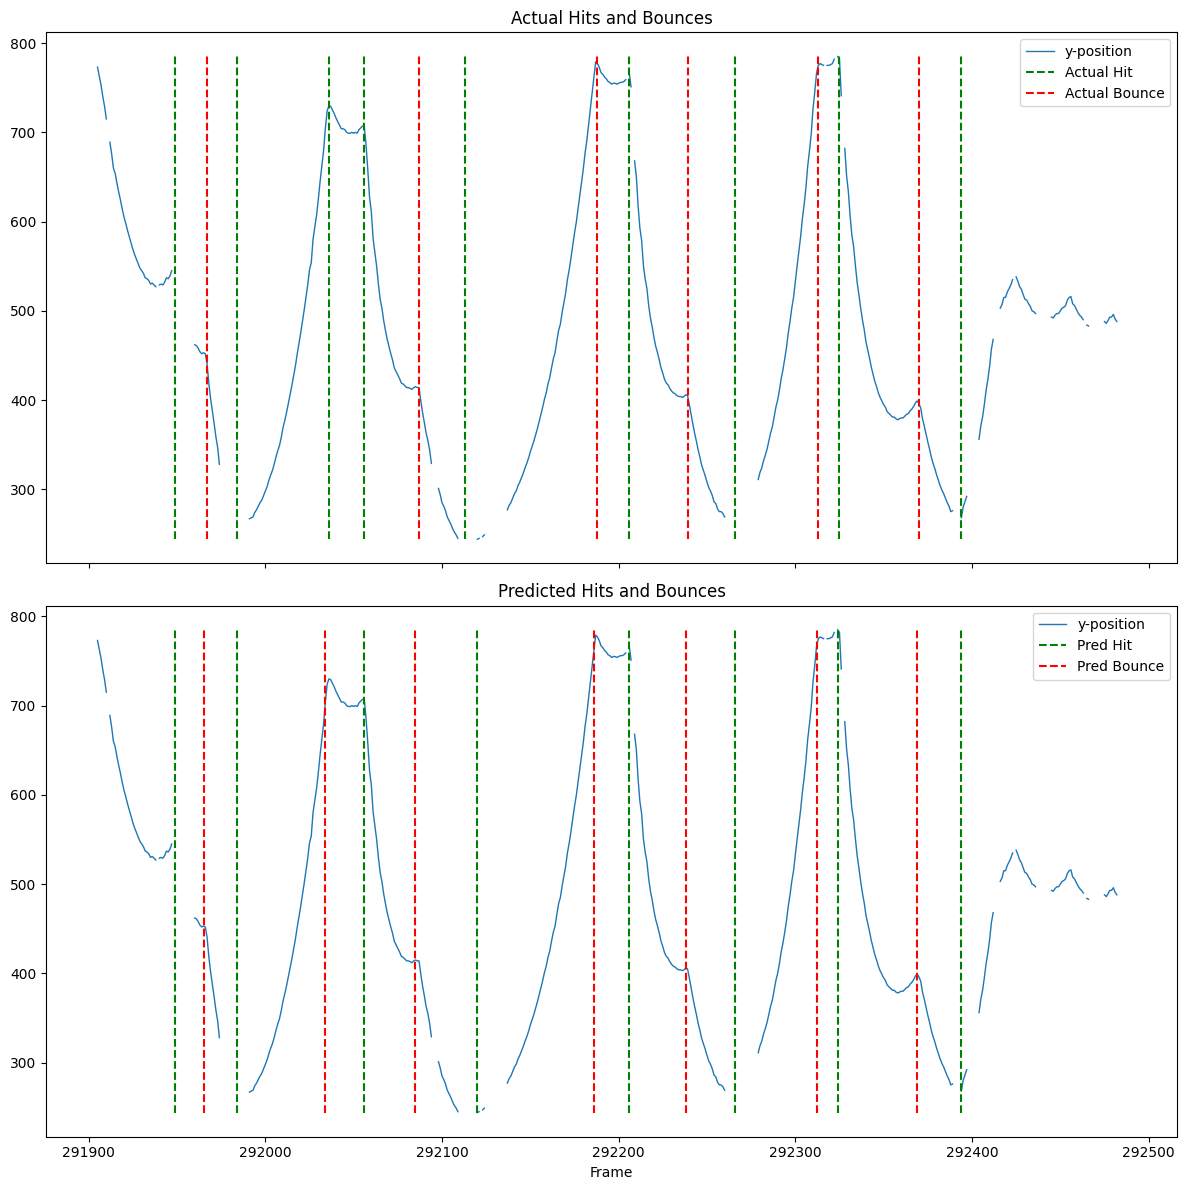

ball_data_103.json


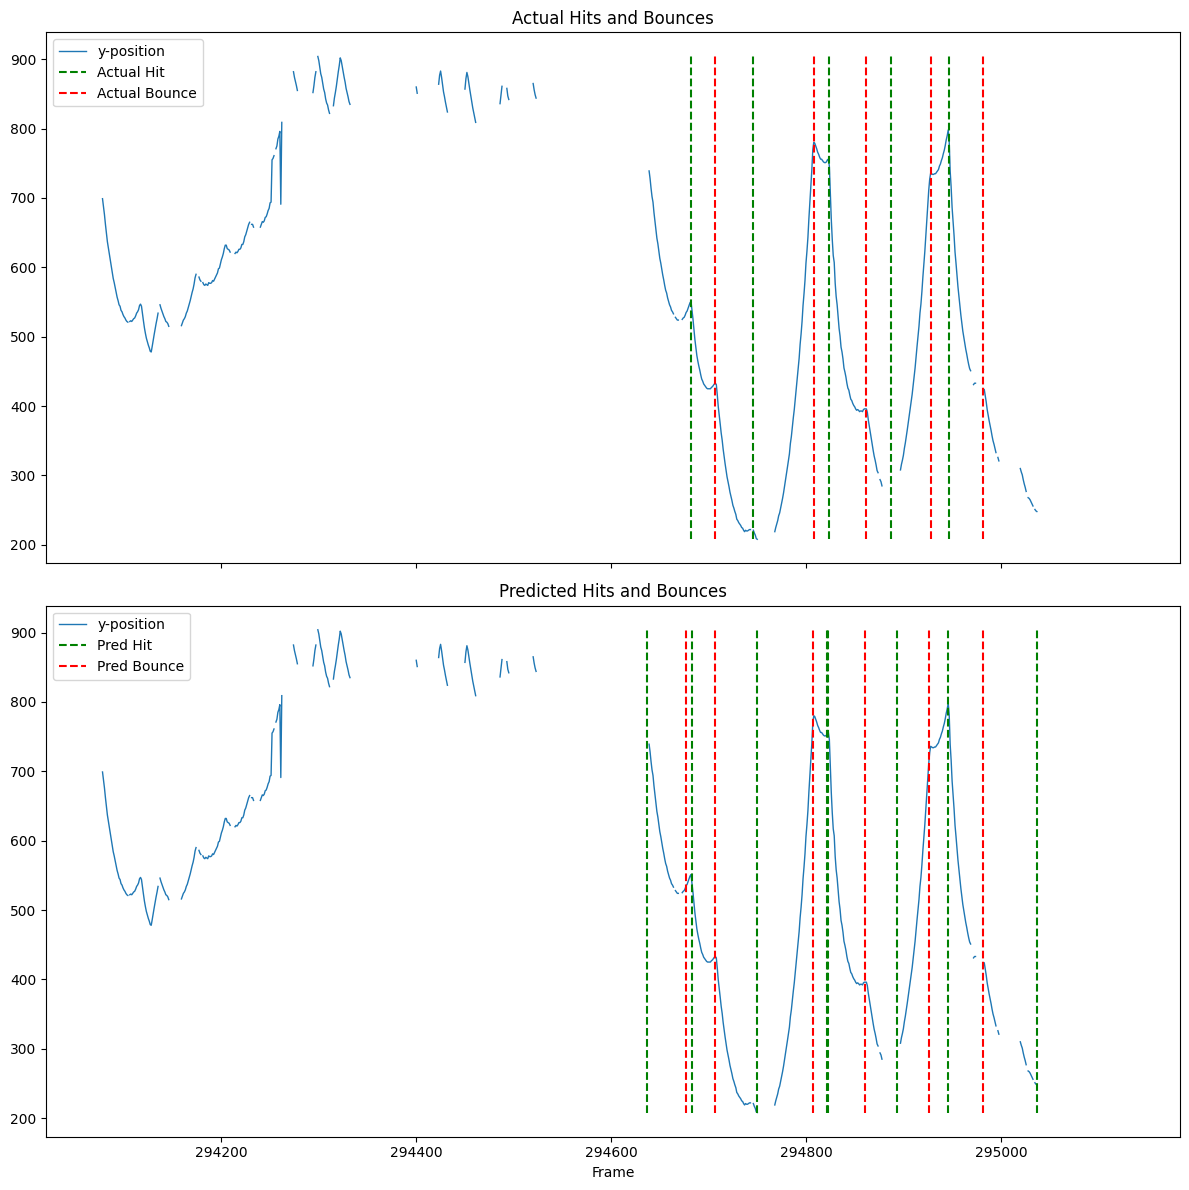

ball_data_104.json


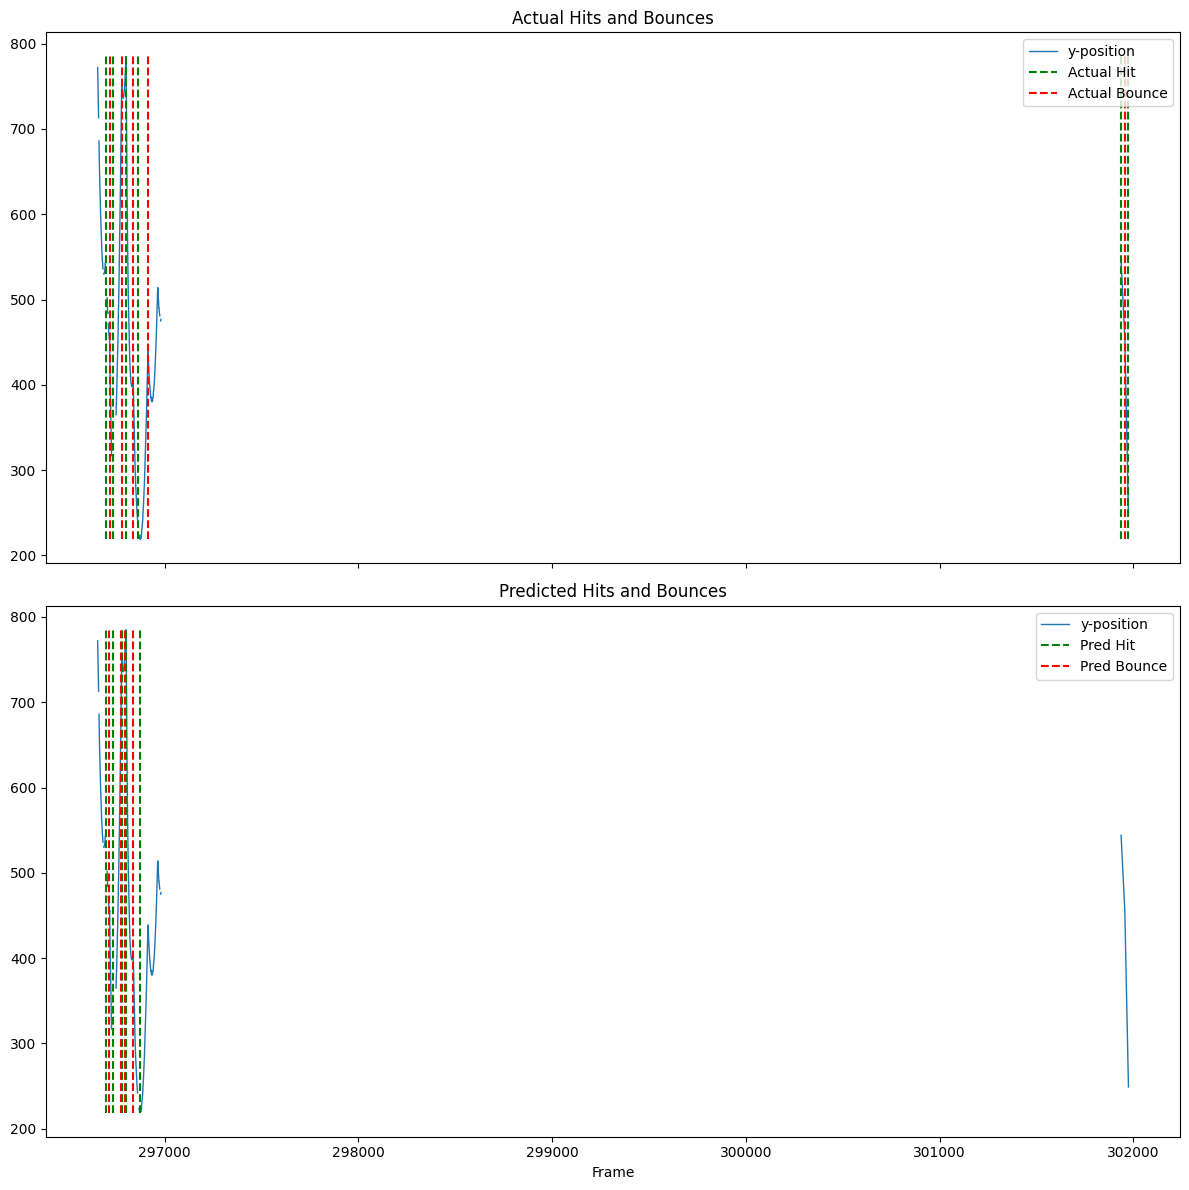

ball_data_105.json


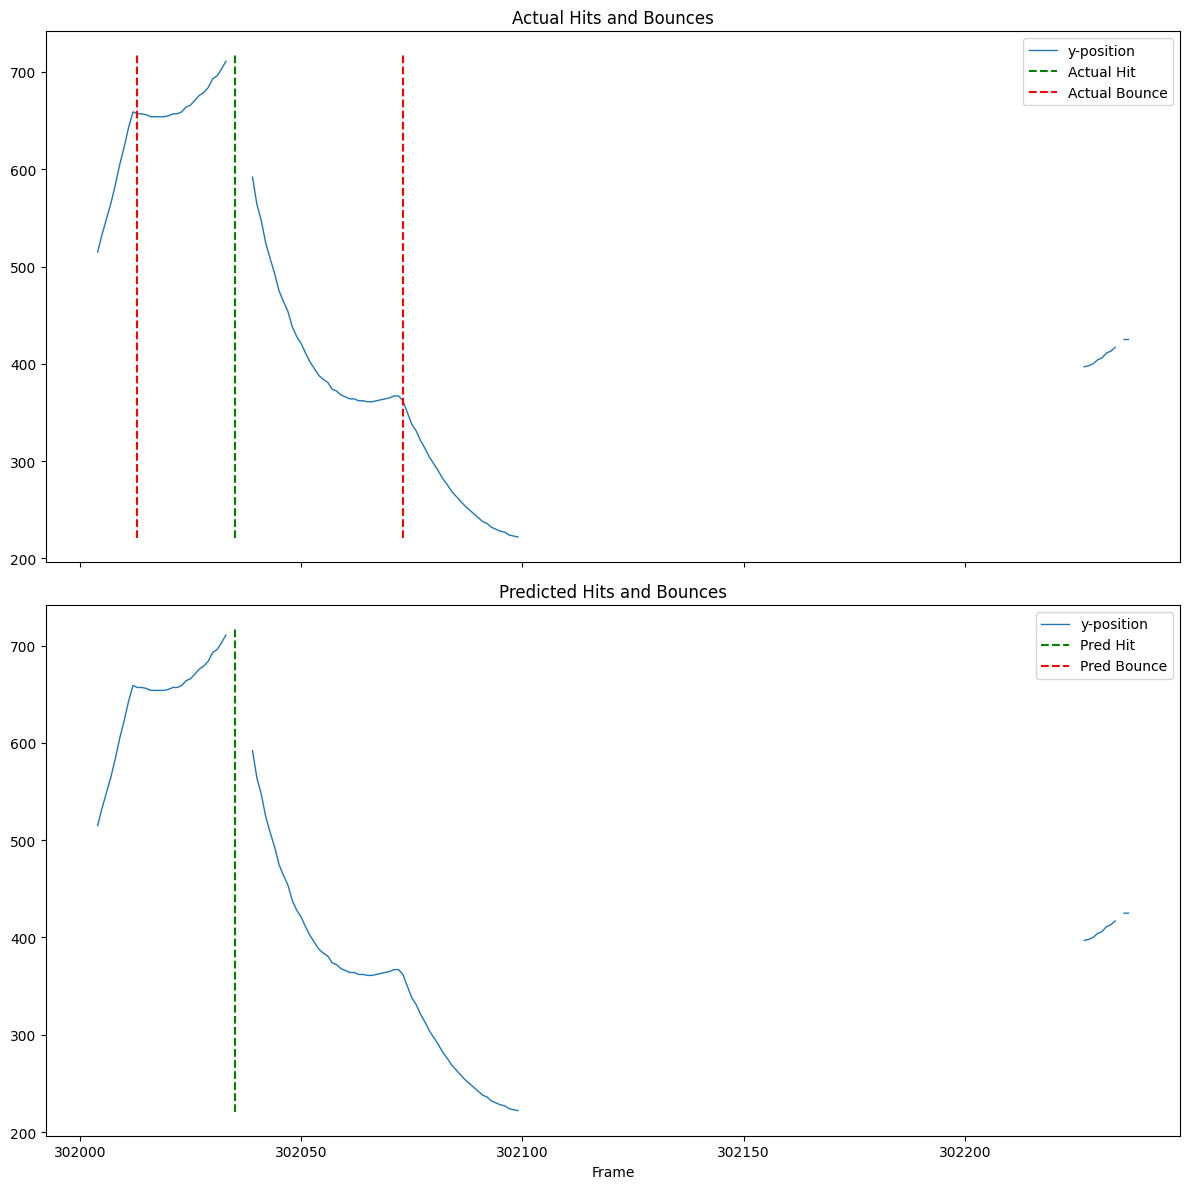

ball_data_106.json


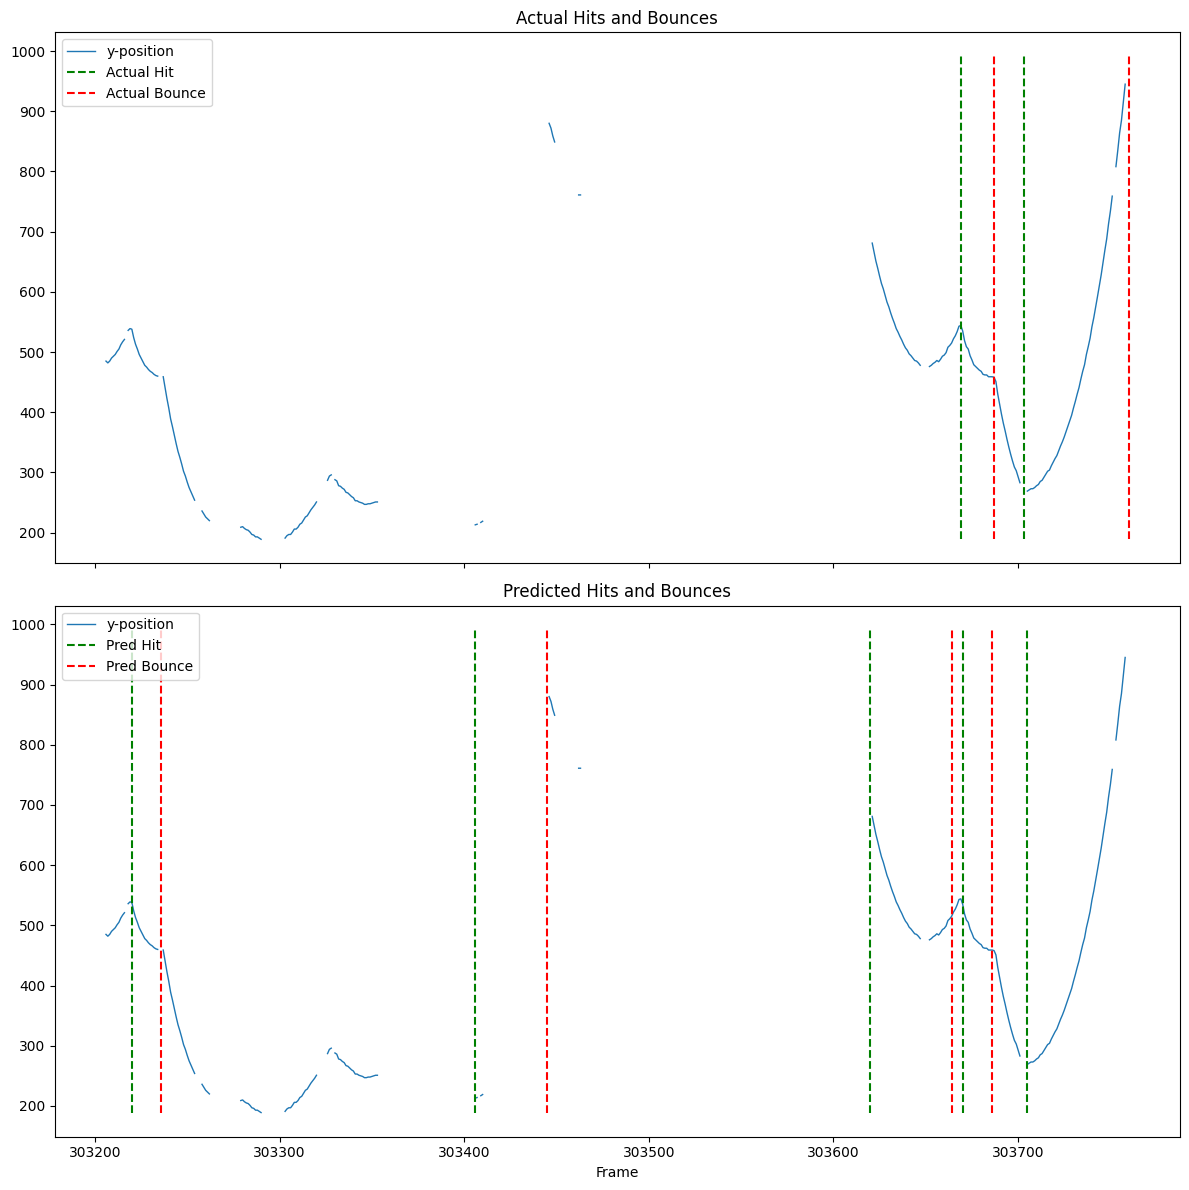

ball_data_107.json


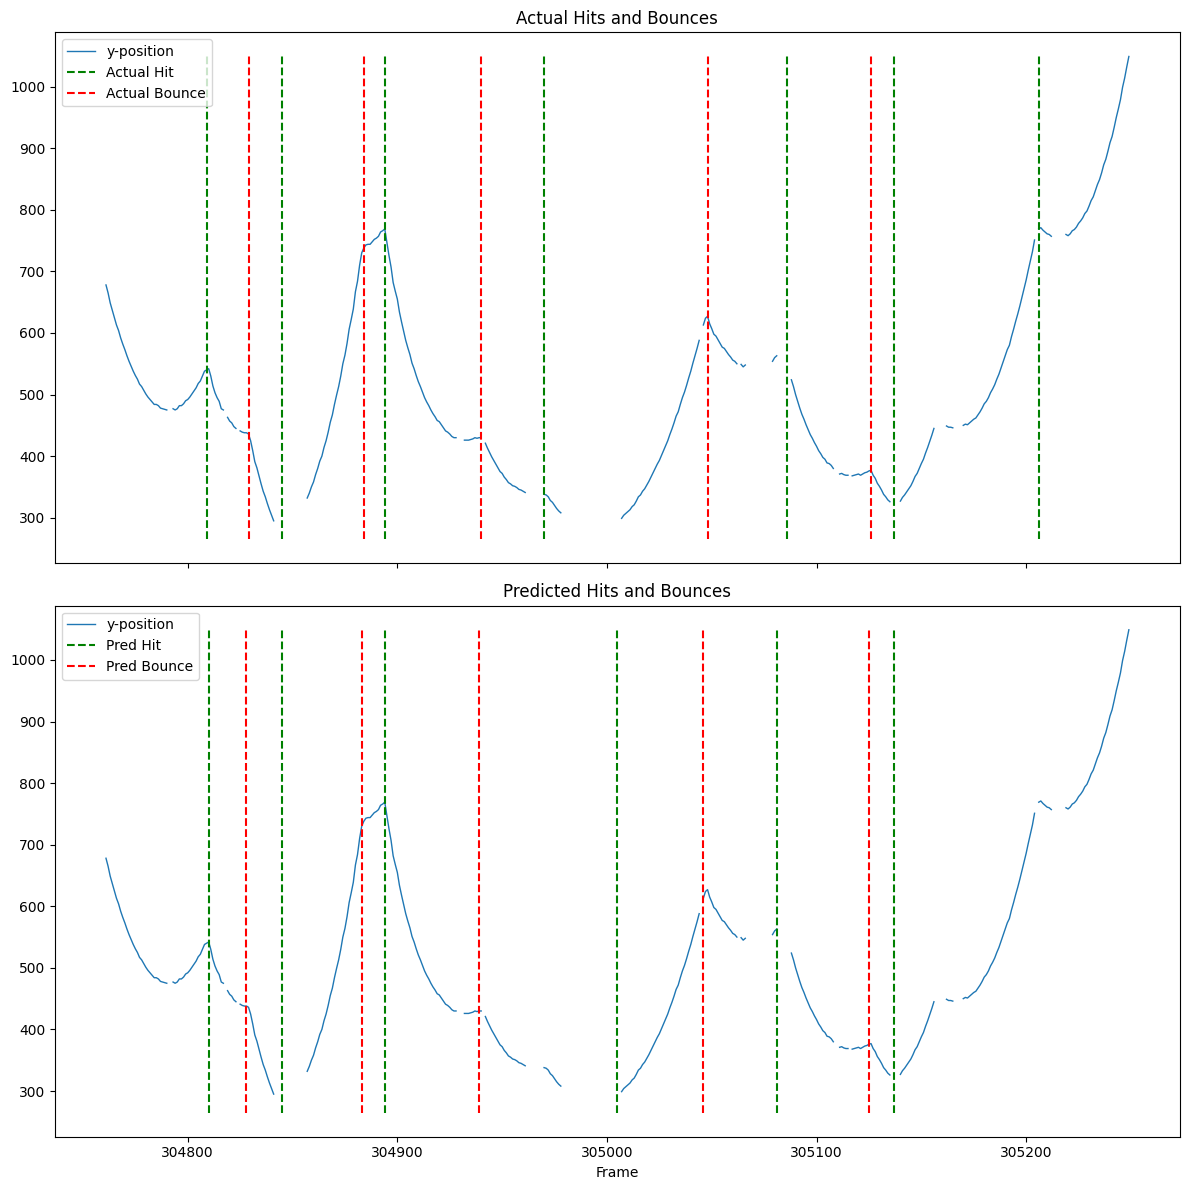

ball_data_108.json


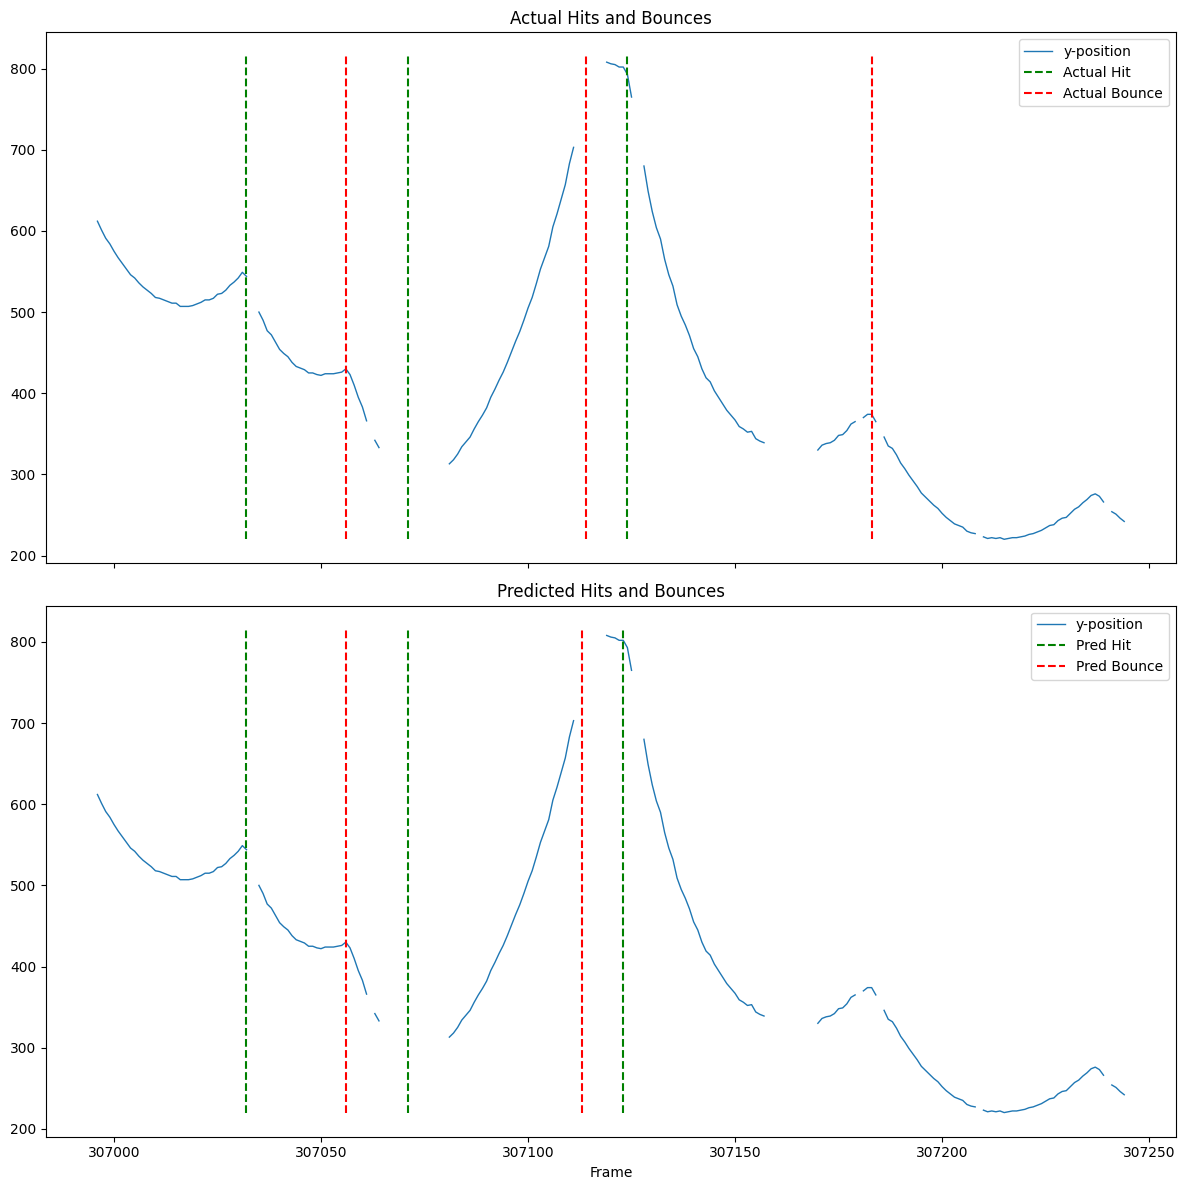

ball_data_109.json


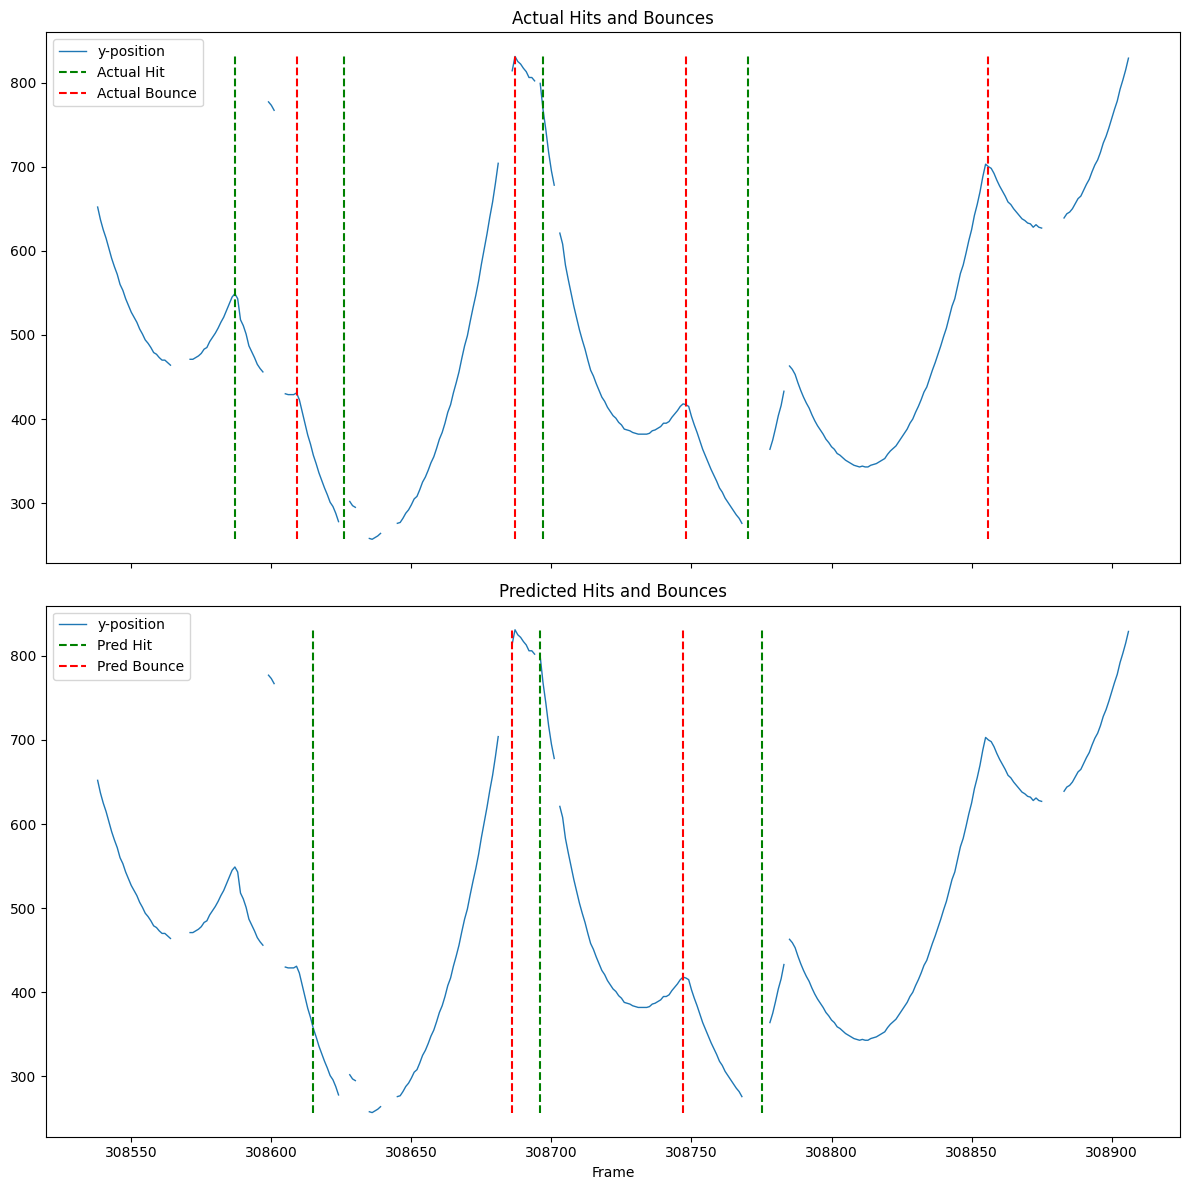

ball_data_111.json


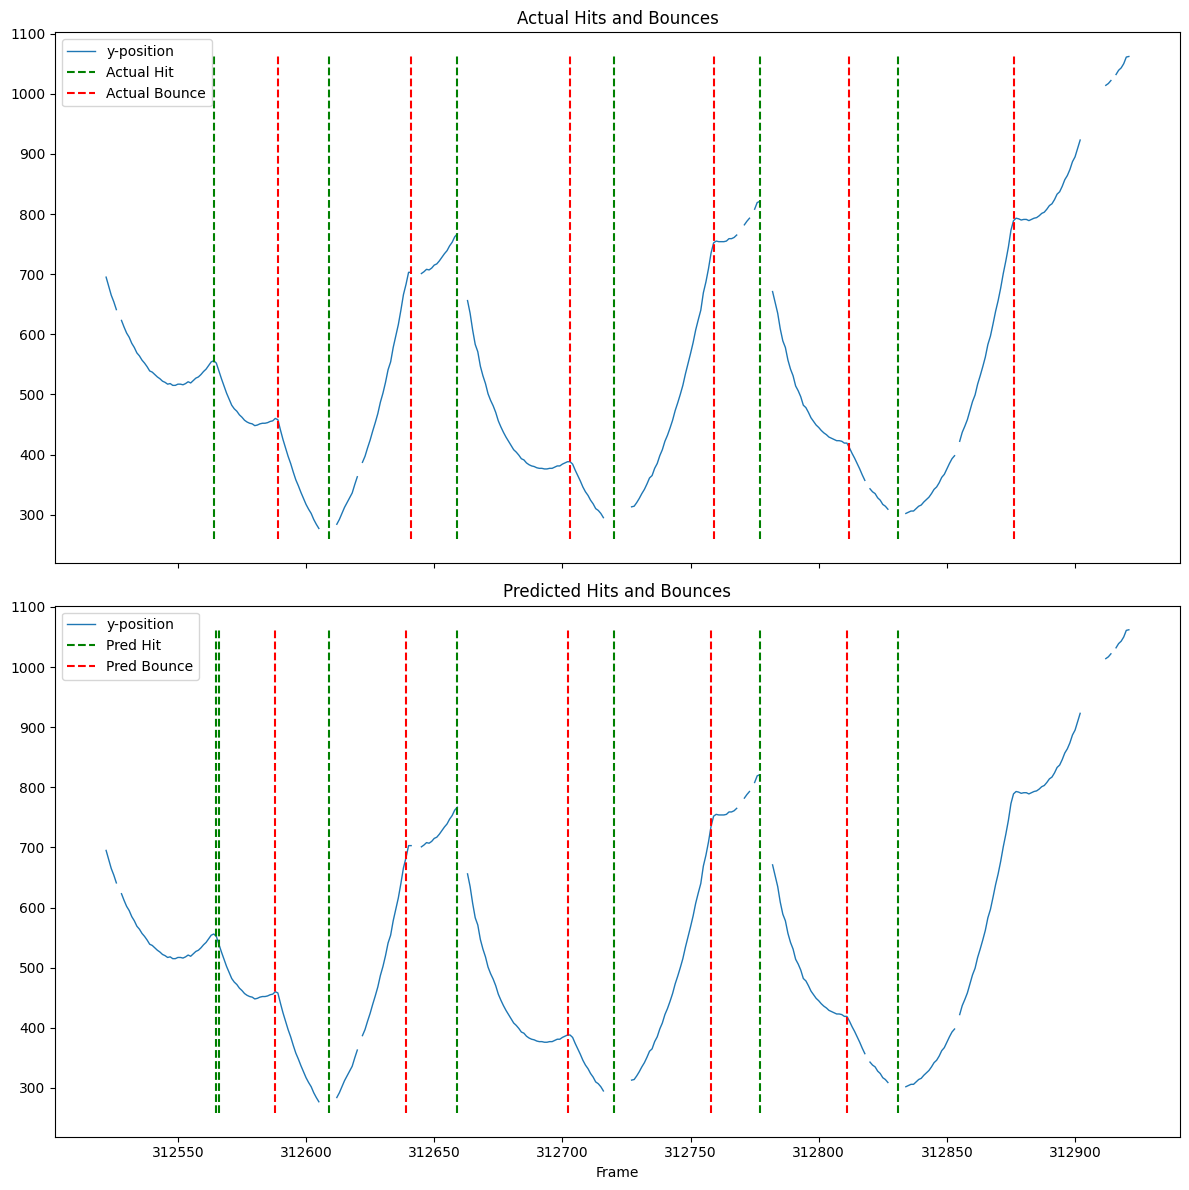

ball_data_114.json


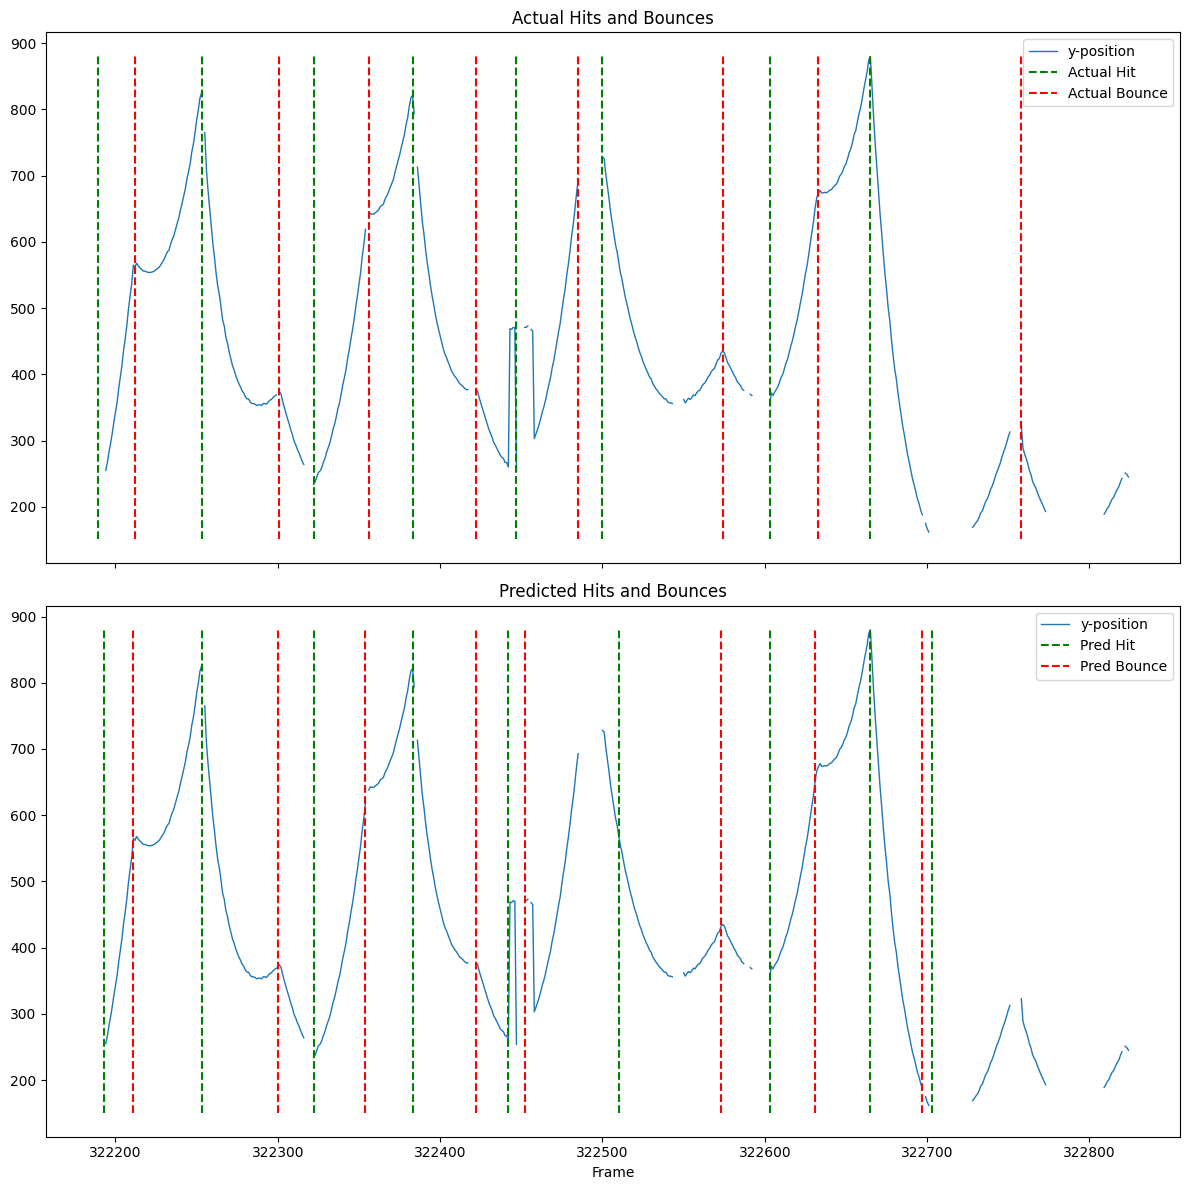

ball_data_115.json


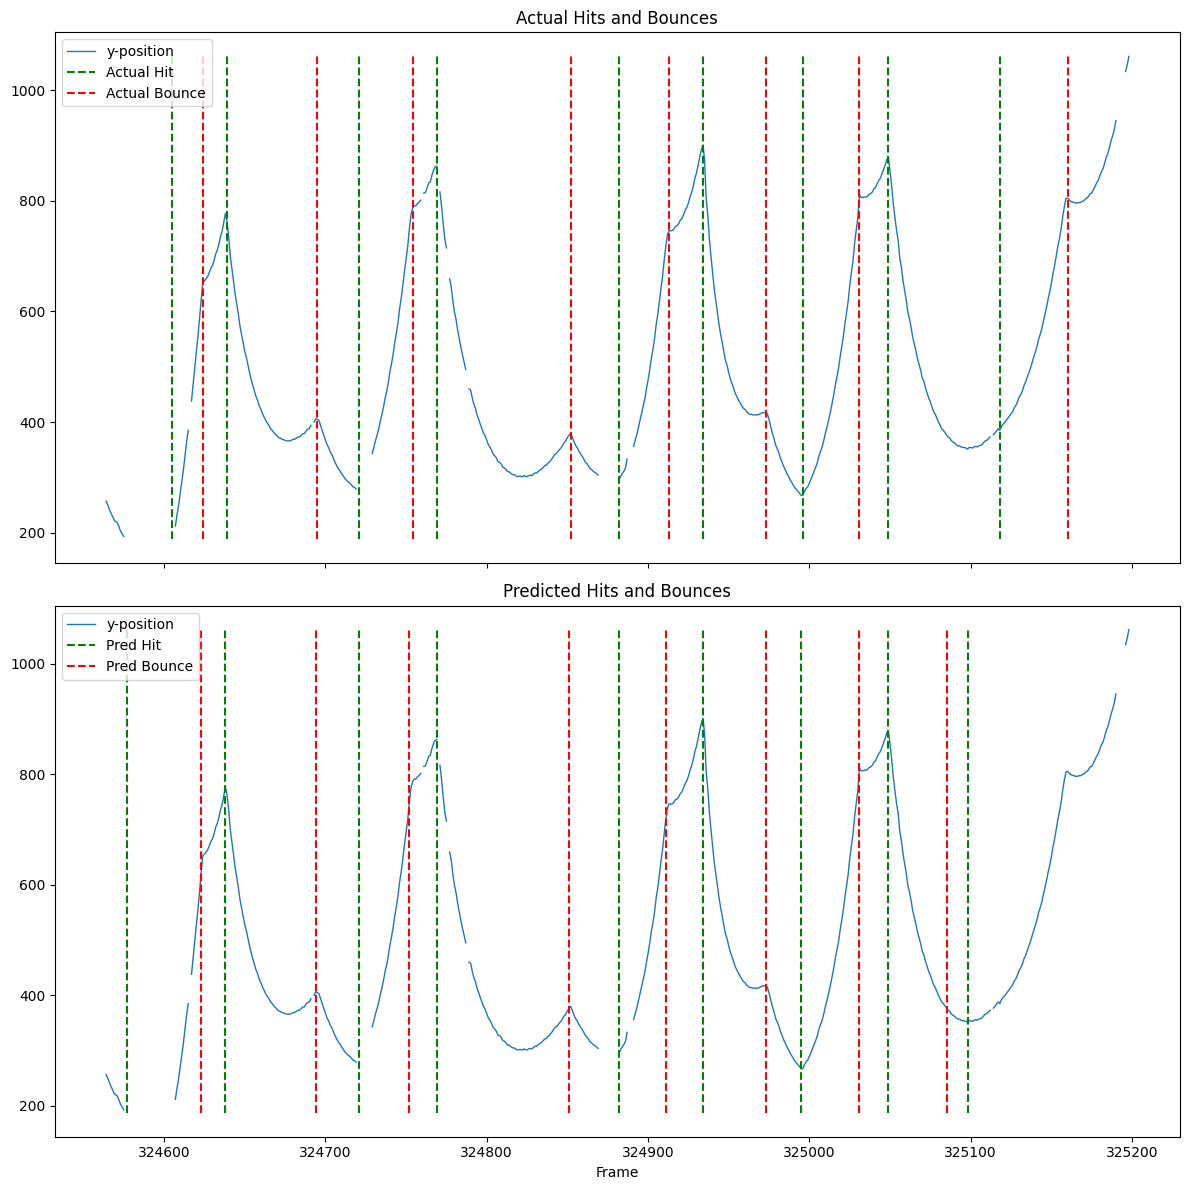

ball_data_116.json


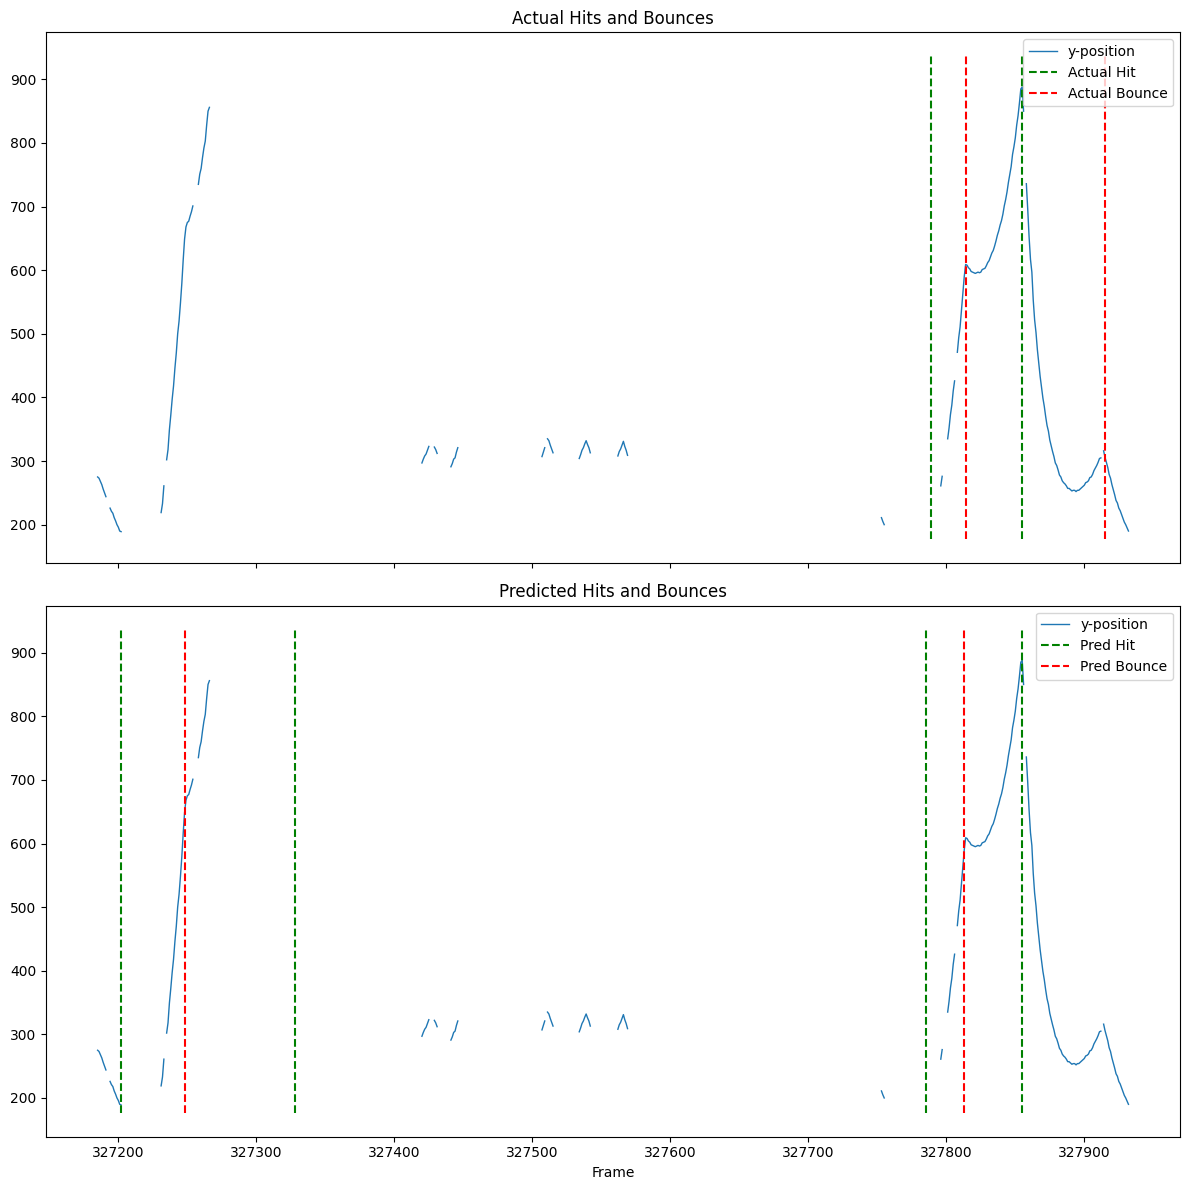

ball_data_117.json


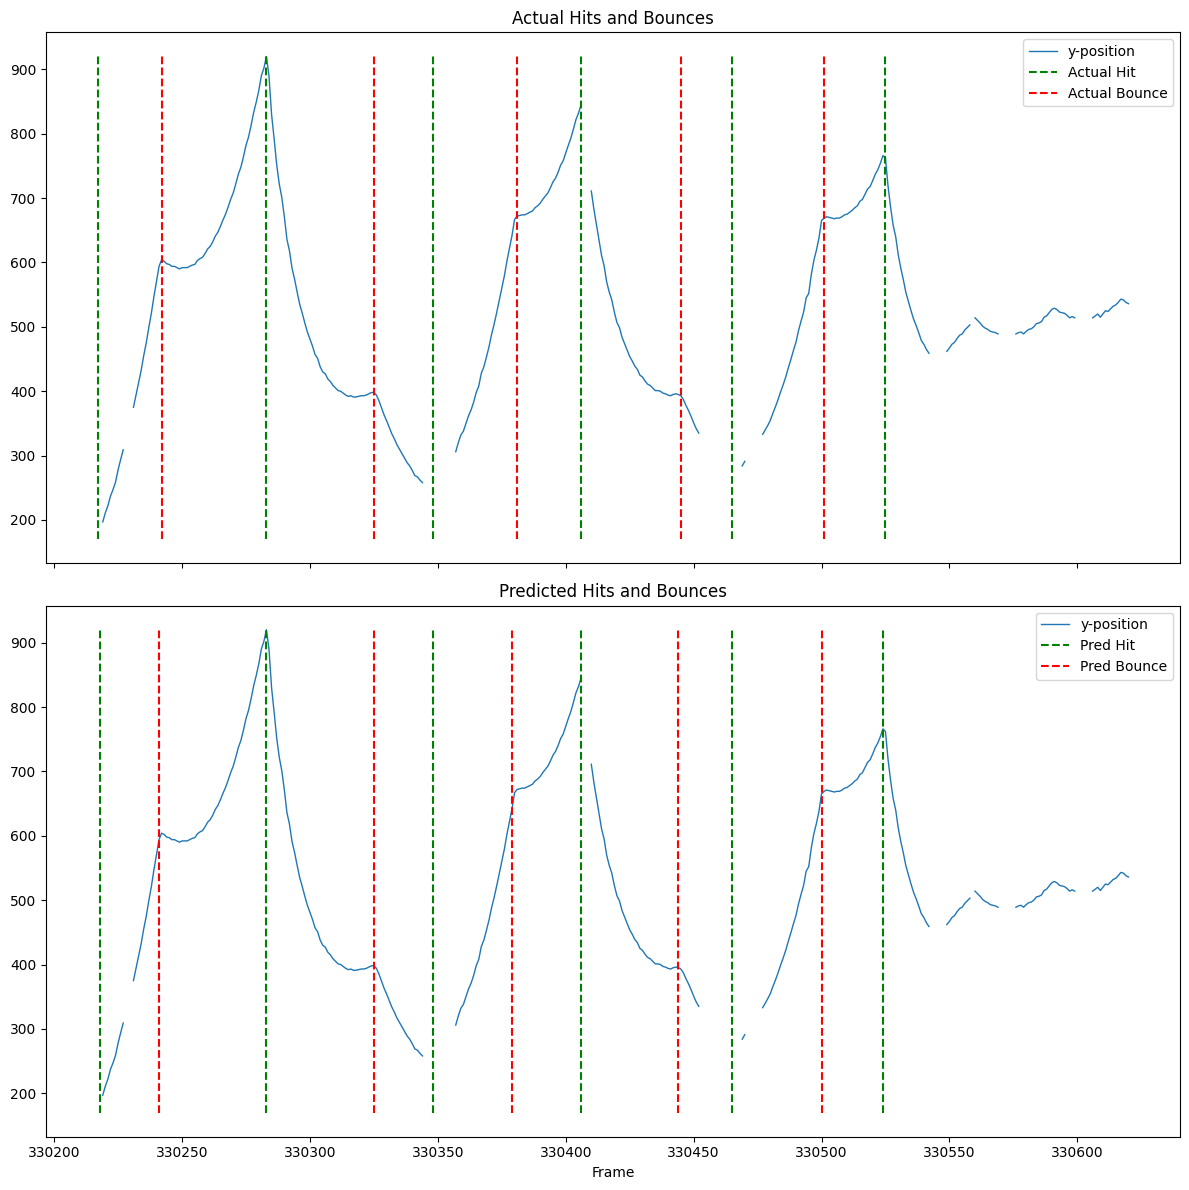

ball_data_118.json


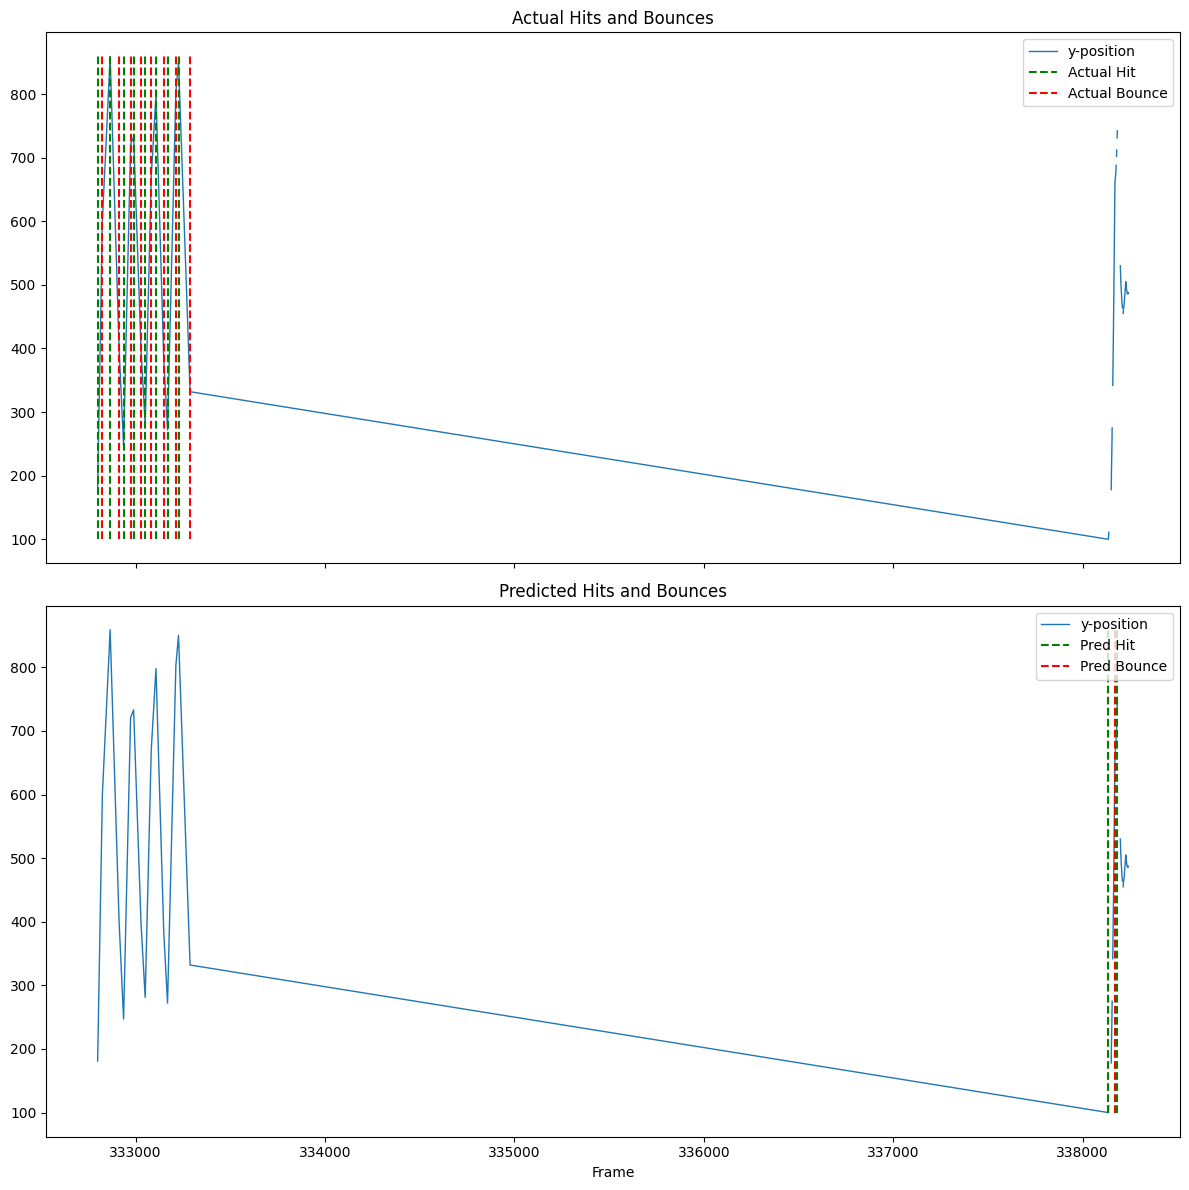

ball_data_12.json


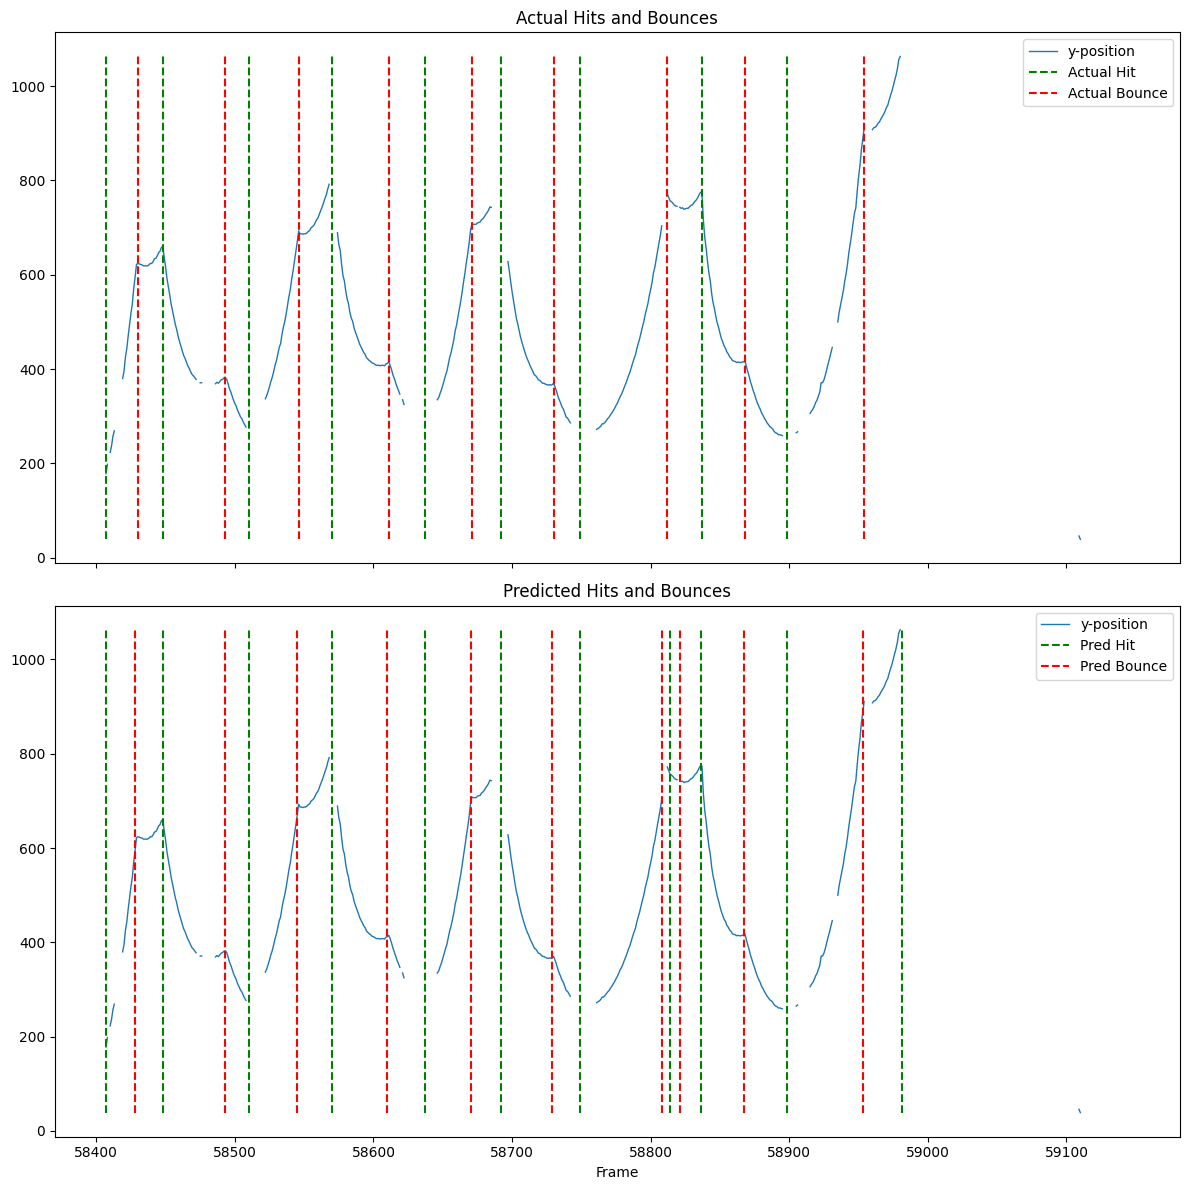

ball_data_120.json


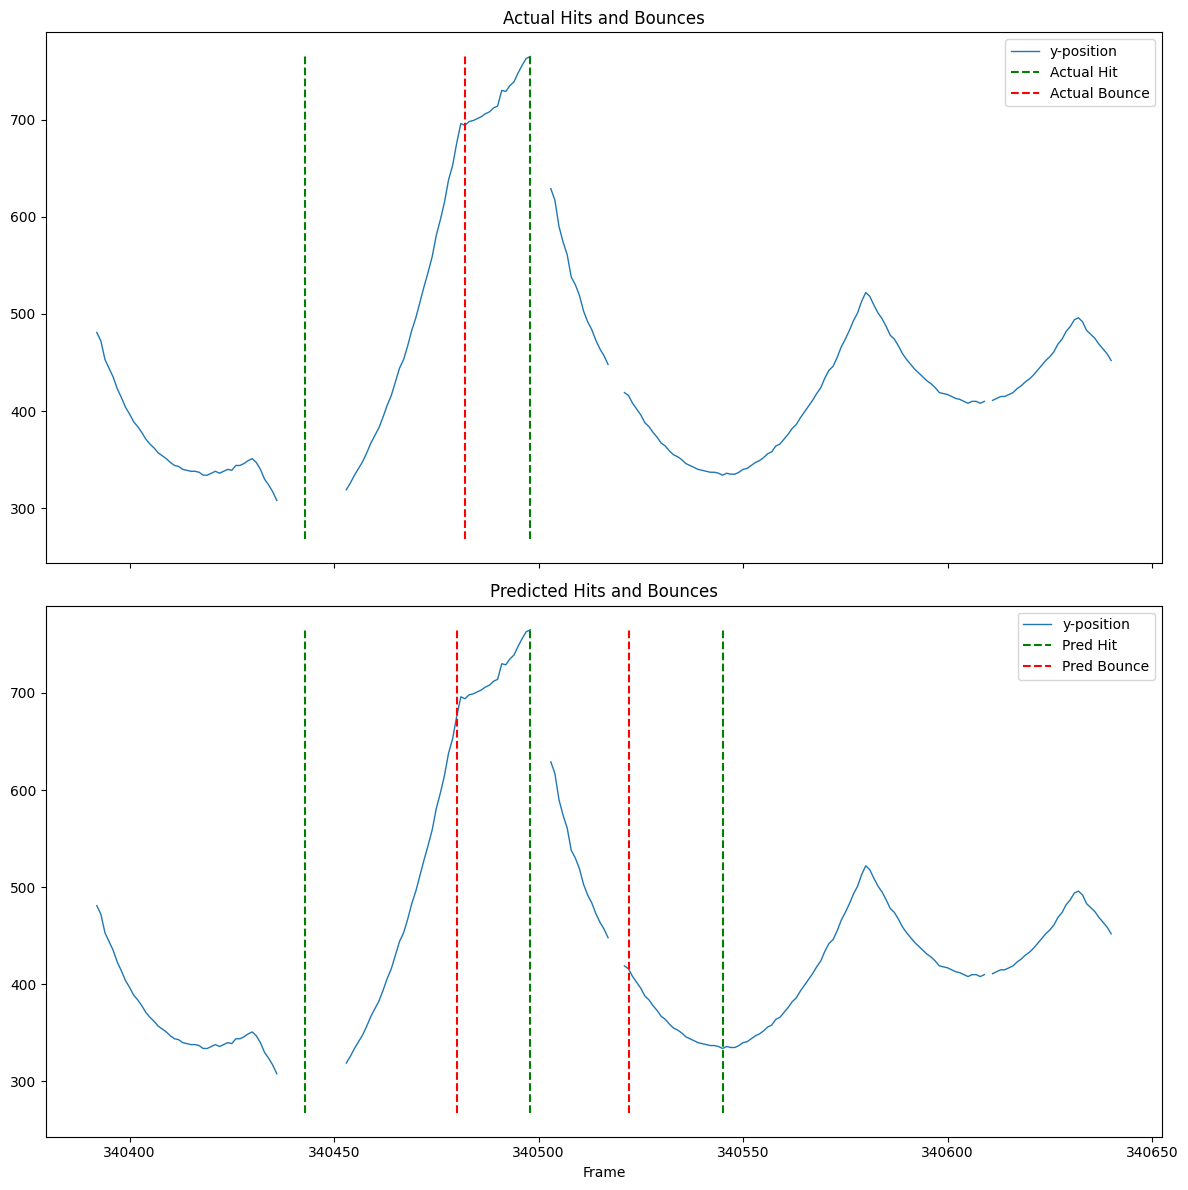

ball_data_121.json


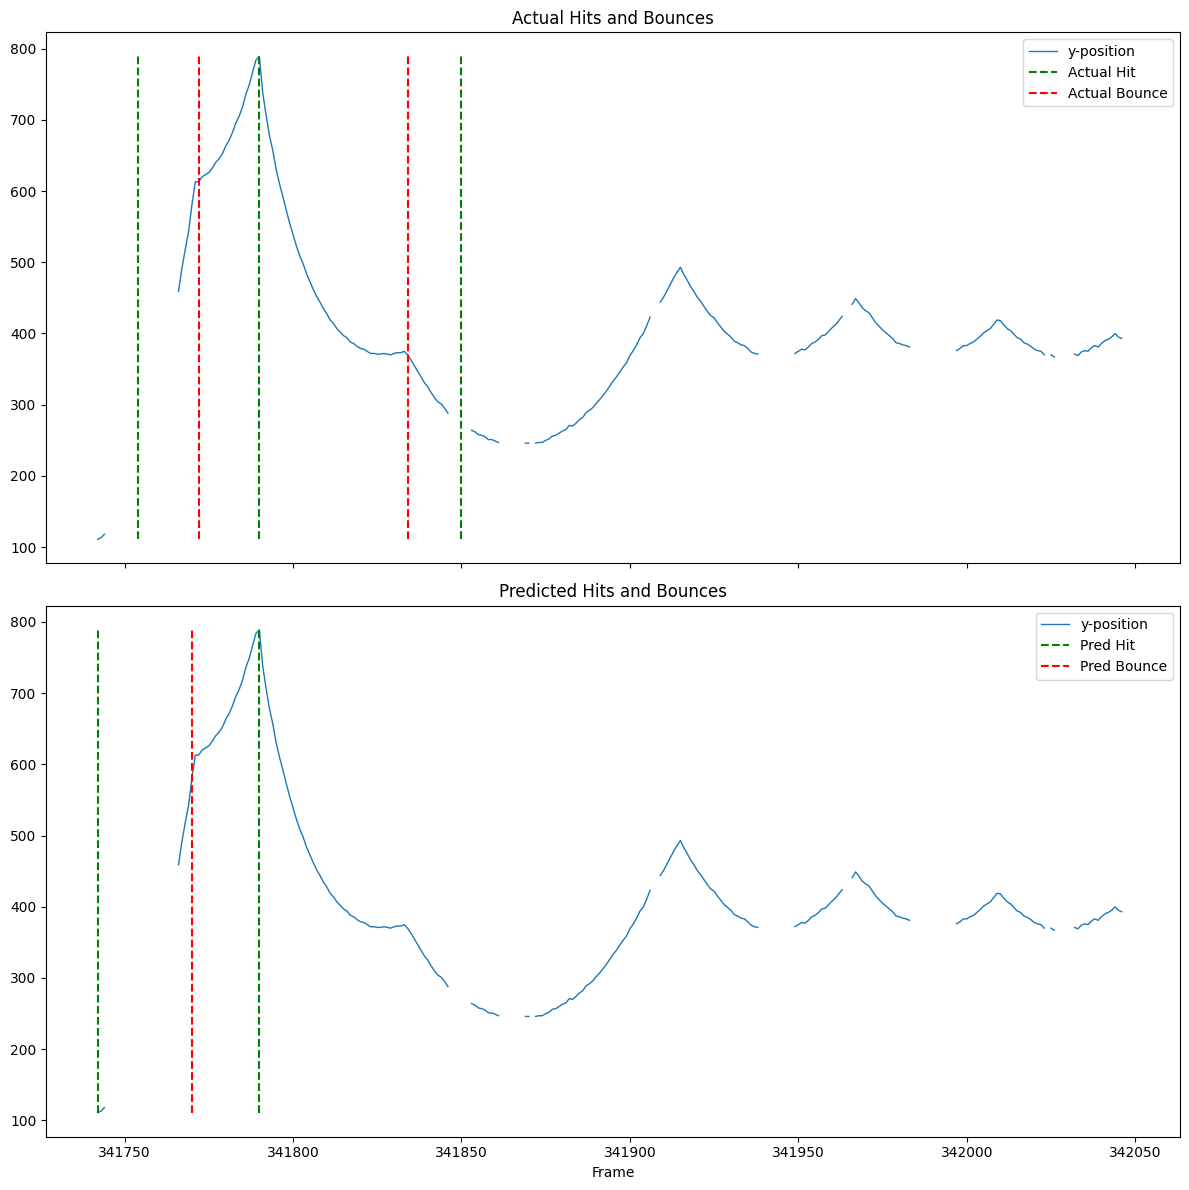

In [6]:
for i in range(20):
    unsupervised_output = unsupervised_hit_bounce_detection(ball_files[i])
    print(ball_files[i])
    plot_predicted_vs_actual_actions(unsupervised_output)